## Importing, reading files and functions


### Importing the necessaries libraries

In [175]:
#Basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#import regex
import re

#import statsmodels
import statsmodels.api as sm
import package_blogPost

### Reading files

In [176]:
df = pd.read_csv('./survey_results_public.csv')
schema = pd.read_csv('./survey_results_schema.csv')

In [177]:
df.head()

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


In [178]:
schema.head()

,qid,qname,question,force_resp,type,selector
0,QID16,S0,"<div><span style=""font-size:19px;""><strong>Hel...",False,DB,TB
1,QID12,MetaInfo,Browser Meta Info,False,Meta,Browser
2,QID1,S1,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
3,QID2,MainBranch,Which of the following options best describes ...,True,MC,SAVR
4,QID296,Employment,Which of the following best describes your cur...,False,MC,MAVR


In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 79 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ResponseId                      73268 non-null  int64  
 1   MainBranch                      73268 non-null  object 
 2   Employment                      71709 non-null  object 
 3   RemoteWork                      58958 non-null  object 
 4   CodingActivities                58899 non-null  object 
 5   EdLevel                         71571 non-null  object 
 6   LearnCode                       71580 non-null  object 
 7   LearnCodeOnline                 50685 non-null  object 
 8   LearnCodeCoursesCert            29389 non-null  object 
 9   YearsCode                       71331 non-null  object 
 10  YearsCodePro                    51833 non-null  object 
 11  DevType                         61302 non-null  object 
 12  OrgSize                         

### Functions

In [232]:
def get_info(column, df, schema, info = 'question'):
    
    '''Shows question and answers of the column
    INPUT:
    column - column of the dataframe
    schema - dataframe with the informations
    info - information to show
    
    OUTPUT:
    print question and answers 
    '''
    
    question = list(schema[schema['qname'] == column][info])[0]
    
    print('Question: {}\n Answers: {}'.format(question, df[column].unique()))



def explode(data, column):

    '''Explode a column with more than one answer marked to for a dataframe with one 
    answer per row.
    
    INPUT: 
    data - daframe with the column to be exploded
    column - column wich will be exploded]
    
    OUTPUT:
    df_exploded - dataframe exploded'''

    column_to_explode = data[column].str.split(';')
    df_to_explode = data.join(column_to_explode, lsuffix = '_original')
    df_exploded = df_to_explode.explode(column)
    
    return df_exploded



def replace_answers(column, order, df, inplace = False):
    
    '''replace a answer with more than one option marked for answer with one option.
    
    INPUT:
    column - column where the answers will be replaced
    order - order which answers will be replaced, the answer will be replaced by element 
    that appears first
    df - dataframe
    inplace - whether or not the dataframe will be substituted

    OUTPUT: 
    dataframe with answers substituted
    '''

    df[column] = df[column].astype(str)
    for i in range(len(order)):
        for answer in df[column].unique():
            if re.search(order[i], answer):
                replace_by = order[i]
        
                df[column].replace({answer : replace_by}, inplace = inplace)
    
    return df 



def countplot_normalized(data, y = None, x = None ,orient = None, sort = True, 
                         ascending = False, bins = None, dropna = True, 
                         color = sns.color_palette()[0], order = None, rotation = 90, 
                         palette = None):
    
    '''function similar to countplot function from seaborn, but with values of count 
    normalized
    
    INPLACE:
    data, y, x, orient, color, palette - see in barplot function from seaborn
    normalize, sort, ascending, bins, dropna - see in value_counts method from pandas
    
    OUTPUT:
    chart similar to countplot function from seaborn
    '''

    if y != None:
        count = data[y].value_counts(normalize = True, sort = sort, ascending = ascending,
                                     bins = bins, dropna = dropna)
        if order is not None:
            count = count.reindex(order)
        plot = sns.barplot(count, count.index, color = color, orient = orient,
                           palette = palette)

    if x != None:
        count = data[x].value_counts(normalize = True, sort = sort, ascending = ascending,
                                     bins = bins, dropna = dropna)
        if order is not None:
            count = count.reindex(order)
        plot = sns.barplot(count.index,count , color = color, orient = orient, 
                           palette = palette)
        plt.xticks(rotation = rotation)
        


def countplot_normalized_exploded(data, y = None, x = None ,orient = None, sort = True, 
                                  ascending = False, bins = None, dropna = True,
                                  color = sns.color_palette()[0], order = None, 
                                  rotation = 90, palette = None):
    
    '''function similar to countplot function from seaborn and countplot_normalized, 
    but with values of count normalized. This function is the substituted for 
    countplot_normalize for column that need to be exploded. The sum of values won't be
    1
    
    INPLACE:
    data - non-exploded data
    y, x, orient, color, palette - see in barplot function from seaborn
    normalize, sort, ascending, bins, dropna - see in value_counts method from pandas
    
    OUTPUT:
    chart similar to countplot function from seaborn
    '''
    
    if y != None:
        exploded_data = explode(data, y)
        count = exploded_data[y].value_counts(sort = sort, ascending = ascending,
                                              bins = bins, dropna = dropna)/data[y].count()
        if order is not None:
            count = count.reindex(order)
        sns.barplot(count, count.index, color = color, orient = orient,
                           palette = palette)

        
    if x != None:
        exploded_data = explode(data, x)
        count = exploded_data[x].value_counts(sort = sort, ascending = ascending, 
                                              bins = bins, dropna = dropna)/data[x].count()
        if order is not None:
            count = count.reindex(order)
        sns.barplot(count.index,count , color = color, orient = orient,
                           palette = palette)
        plt.xticks(rotation = rotation)

## Wrangling and data cleasing

### General

In [181]:
#Select only people who works as developer
df_use = df.query('MainBranch == "I am a developer by profession"')

In [182]:
#Selecting necessaries columns
df_use = df[['Employment', 'RemoteWork', 'EdLevel', 'DevType', 'YearsCode','Age', 'OrgSize', 'Country', 'Gender', 'Knowledge_4', 'Knowledge_7', 'Frequency_1', 'TimeSearching', 'TimeAnswering', 'TrueFalse_1', 'ConvertedCompYearly']]

In [183]:
#Renaming non-descriptive column names
df_use.rename(columns = {'Knowledge_4' : 'AbleFindAnswers',  'Knowledge_7' : 'WaitingAnswersInter', 'Frequency_1' : 'NeedingHelp', 'TrueFalse_1' : 'InvolvedOnboarding', 'ConvertedCompYearly' : 'Salary'}, inplace = True)
schema.replace({'Knowledge_4' : 'AbleFindAnswers',  'Knowledge_7' : 'WaitingAnswersInter', 'Frequency_1' : 'NeedingHelp', 'TrueFalse_1' : 'InvolvedOnboarding', 'ConvertedCompYearly' : 'Salary'}, inplace = True)

C:\Users\bruno\AppData\Local\Temp\ipykernel_23608\1680850306.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_use.rename(columns = {'Knowledge_4' : 'AbleFindAnswers',  'Knowledge_7' : 'WaitingAnswersInter', 'Frequency_1' : 'NeedingHelp', 'TrueFalse_1' : 'InvolvedOnboarding', 'ConvertedCompYearly' : 'Salary'}, inplace = True)


In [184]:
#Renaming EdLevel values
df_use.replace({'Primary/elementary school' : 'Elementary','Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 'Secondary', 'Some college/university study without earning a degree':'Some study without earning a degree',   'Associate degree (A.A., A.S., etc.)' : 'Associate degree','Bachelor’s degree (B.A., B.S., B.Eng., etc.)' : 'Bachelor', 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)' : 'Master', 'Other doctoral degree (Ph.D., Ed.D., etc.)' : 'Doctor', 'Professional degree (JD, MD, etc.)':'Professional degree'}, inplace = True)

C:\Users\bruno\AppData\Local\Temp\ipykernel_23608\2204905677.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_use.replace({'Primary/elementary school' : 'Elementary','Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 'Secondary', 'Some college/university study without earning a degree':'Some study without earning a degree',   'Associate degree (A.A., A.S., etc.)' : 'Associate degree','Bachelor’s degree (B.A., B.S., B.Eng., etc.)' : 'Bachelor', 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)' : 'Master', 'Other doctoral degree (Ph.D., Ed.D., etc.)' : 'Doctor', 'Professional degree (JD, MD, etc.)':'Professional degree'}, inplace = True)


In [185]:
df_use = df_use[df_use.EdLevel.notnull()]

In [239]:
#Cleaning column "Gender"
replace_answers(column = 'Gender', order = ['Non-binary, genderqueer, or gender non-conforming', 'Or, in your own words:'],df = df_use, inplace = True)
df_use['Gender'].replace({'Man;Woman': 'Non-binary, genderqueer, or gender non-conforming'}, inplace = True)
df_use['Gender'].replace({'Non-binary, genderqueer, or gender non-conforming' : 'Non-binary'}, inplace = True)

In [269]:
df_use['OrgSize'].replace({'Just me - I am a freelancer, sole proprietor, etc.': 'Just me'}, inplace = True)

In [267]:
df_use.OrgSize.unique()

array(['20 to 99 employees', '100 to 499 employees', nan, 'I don’t know',
       'Just me - I am a freelancer, sole proprietor, etc.',
       '2 to 9 employees', '5,000 to 9,999 employees',
       '1,000 to 4,999 employees', '10,000 or more employees',
       '500 to 999 employees', '10 to 19 employees'], dtype=object)

In [187]:
#Transforming years coding values from string to float
df_use['YearsCode'].replace({'Less than 1 year' : '0', 'More than 50 years' : '50'}, inplace = True)
df_use['YearsCode'] = df_use['YearsCode'].astype(float)

EdLevel                    0
Country                    0
Gender                     0
Employment                57
YearsCode                367
Age                      753
DevType                10331
RemoteWork             12710
OrgSize                20582
Salary                 33517
TimeSearching          35390
TimeAnswering          35567
InvolvedOnboarding     35766
NeedingHelp            36213
AbleFindAnswers        36485
WaitingAnswersInter    36604
dtype: int64

61258     0
39630     0
63505     0
63507     0
63508     0
         ..
98       12
28092    12
20438    13
26600    13
72531    13
Length: 71571, dtype: int64

C:\Users\bruno\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


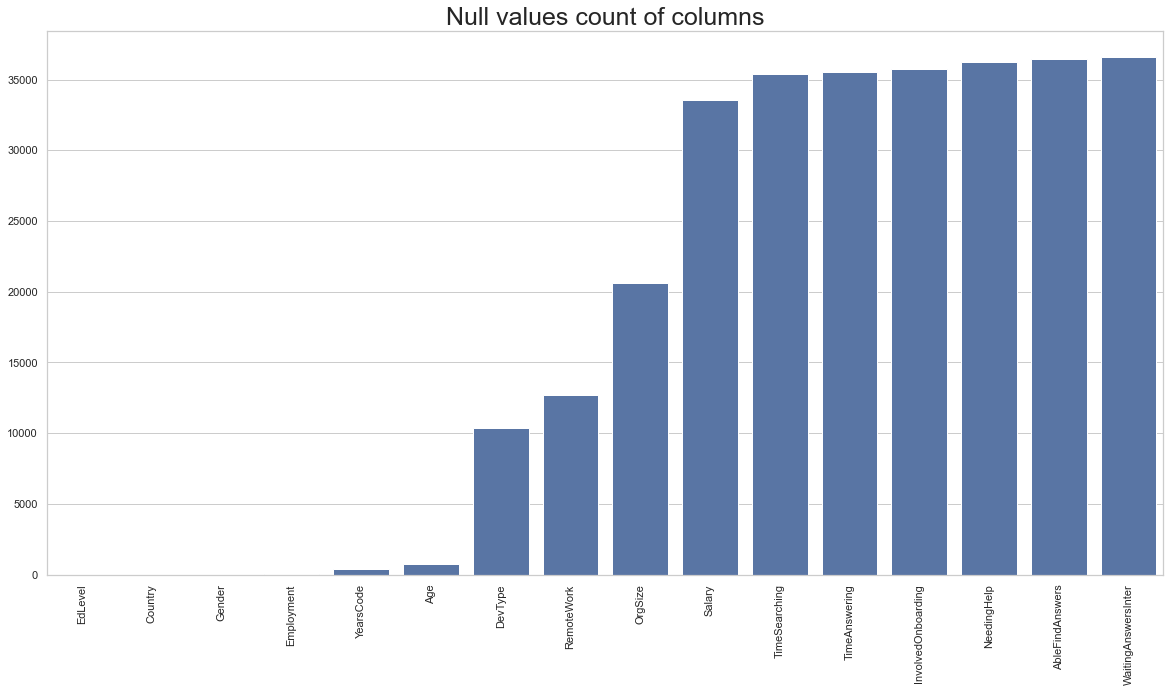

In [188]:
#Analysing null values
display(df_use.isnull().sum(axis = 0).sort_values())
display(df_use.isnull().sum(axis = 1).sort_values())

plt.figure(figsize = (20,10));
sns.barplot(df_use.isnull().sum(axis = 0).sort_values().index, df_use.isnull().sum(axis = 0).sort_values(), color = sns.color_palette()[0]);
plt.xticks(rotation = 90);
plt.title('Null values count of columns', size = 25);

In [189]:
df_use.dropna(how = 'all', thresh = 4, inplace = True)

### DataFrames

In [190]:
top_10_countries = df_use[df_use['Country'].isin(df_use.Country.value_counts().head(10).index)]

In [191]:
df_use_250k = df_use.query('Salary <= 250000')

In [192]:
top_10_countries_250k_non_null = top_10_countries[top_10_countries.Salary.notnull() & top_10_countries.YearsCode.notnull() & (top_10_countries.Salary <= 250000)]
top_10_countries_250k_non_null['intercept'] = 1

top_10_countries_250k_non_null[sorted(top_10_countries.Country.unique())] = pd.get_dummies(top_10_countries_250k_non_null['Country'])

for Country in sorted(top_10_countries.Country.unique()):
    top_10_countries_250k_non_null[Country + '_code'] = top_10_countries_250k_non_null[Country] * top_10_countries_250k_non_null['YearsCode']

top_10_countries_250k_non_null[sorted(top_10_countries_250k_non_null.EdLevel.unique())] = pd.get_dummies(top_10_countries_250k_non_null.EdLevel)

for ed in sorted(top_10_countries_250k_non_null.EdLevel.unique()):
    top_10_countries_250k_non_null[ed + '_code'] = top_10_countries_250k_non_null[ed] * top_10_countries_250k_non_null['YearsCode']


C:\Users\bruno\AppData\Local\Temp\ipykernel_23608\2677181913.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_countries_250k_non_null['intercept'] = 1
C:\Users\bruno\AppData\Local\Temp\ipykernel_23608\2677181913.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_countries_250k_non_null[sorted(top_10_countries.Country.unique())] = pd.get_dummies(top_10_countries_250k_non_null['Country'])
C:\Users\bruno\AppData\Local\Temp\ipykernel_23608\2677181913.py:4: SettingWithCopyWarning: 
A value is t

C:\Users\bruno\AppData\Local\Temp\ipykernel_23608\2677181913.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_countries_250k_non_null[sorted(top_10_countries_250k_non_null.EdLevel.unique())] = pd.get_dummies(top_10_countries_250k_non_null.EdLevel)
C:\Users\bruno\AppData\Local\Temp\ipykernel_23608\2677181913.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_countries_250k_non_null[sorted(top_10_countries_250k_non_null.EdLevel.unique())] = pd.get_dummies(top_10_countries_250k_non_null.EdLev

### Exploded dataframes

In [193]:
exploded_DevType = explode(df_use, 'DevType')

In [194]:
exploded_DevType

,Employment,RemoteWork,EdLevel,DevType_original,YearsCode,Age,OrgSize,Country,Gender,AbleFindAnswers,WaitingAnswersInter,NeedingHelp,TimeSearching,TimeAnswering,InvolvedOnboarding,Salary,DevType
2,"Employed, full-time","Hybrid (some remote, some in-person)",Master,Data scientist or machine learning specialist;...,14.0,25-34 years old,20 to 99 employees,United Kingdom of Great Britain and Northern I...,Man,NaN,NaN,NaN,NaN,NaN,NaN,40205.0,Data scientist or machine learning specialist
2,"Employed, full-time","Hybrid (some remote, some in-person)",Master,Data scientist or machine learning specialist;...,14.0,25-34 years old,20 to 99 employees,United Kingdom of Great Britain and Northern I...,Man,NaN,NaN,NaN,NaN,NaN,NaN,40205.0,"Developer, front-end"
2,"Employed, full-time","Hybrid (some remote, some in-person)",Master,Data scientist or machine learning specialist;...,14.0,25-34 years old,20 to 99 employees,United Kingdom of Great Britain and Northern I...,Man,NaN,NaN,NaN,NaN,NaN,NaN,40205.0,"Engineer, data"
2,"Employed, full-time","Hybrid (some remote, some in-person)",Master,Data scientist or machine learning specialist;...,14.0,25-34 years old,20 to 99 employees,United Kingdom of Great Britain and Northern I...,Man,NaN,NaN,NaN,NaN,NaN,NaN,40205.0,"Engineer, site reliability"
3,"Employed, full-time",Fully remote,Bachelor,"Developer, full-stack",20.0,35-44 years old,100 to 499 employees,Israel,Man,NaN,NaN,NaN,NaN,NaN,NaN,215232.0,"Developer, full-stack"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73267,"Independent contractor, freelancer, or self-em...",Fully remote,Bachelor,"Developer, front-end;Engineer, data;Engineer, ...",16.0,25-34 years old,NaN,Canada,Man,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Data or business analyst
73267,"Independent contractor, freelancer, or self-em...",Fully remote,Bachelor,"Developer, front-end;Engineer, data;Engineer, ...",16.0,25-34 years old,NaN,Canada,Man,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Designer
73267,"Independent contractor, freelancer, or self-em...",Fully remote,Bachelor,"Developer, front-end;Engineer, data;Engineer, ...",16.0,25-34 years old,NaN,Canada,Man,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Scientist
73267,"Independent contractor, freelancer, or self-em...",Fully remote,Bachelor,"Developer, front-end;Engineer, data;Engineer, ...",16.0,25-34 years old,NaN,Canada,Man,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Product manager


In [195]:
exploded_Employment = explode(df_use, 'Employment')

### Orders of column values

In [275]:
order_Age = ['Under 18 years old',
 '18-24 years old',
 '25-34 years old',
 '35-44 years old',
 '45-54 years old',
 '55-64 years old',
 '65 years or older',
 'Prefer not to say']

order_DevType = list(exploded_DevType.DevType.value_counts().index)

order_OrgSize = ['Just me',
 '2 to 9 employees',
 '10 to 19 employees',
 '20 to 99 employees',
 '100 to 499 employees',
 '500 to 999 employees',
 '1,000 to 4,999 employees',
 '5,000 to 9,999 employees',
 '10,000 or more employees',
 'I don’t know']

order_EdLevel = ['Elementary',
 'Secondary',
 'Some study without earning a degree',
 'Associate degree',
 'Bachelor',
 'Master',
 'Doctor',
 'Professional degree',
 'Something else']

### Palettes

In [197]:
palette_DevType = ['#D61C4E' if Type in ['Data scientist or machine learning specialist',
                                         'Academic researcher', 'Educator', 'Scientist']
                   else '#FEDB39' if Type in ['Student']
                   else '#293462'  
                   for Type in order_DevType]

palette_EdLevel = ['#F637EC' if EdLevel in ['Bachelor', 'Master', 'Doctor'] 
                   else '#3330E4'
                   for EdLevel in order_EdLevel]

## EDA

### One dimensional EDA

In [198]:
sns.set_theme(rc = {'figure.figsize':(12, 8)}, style = 'whitegrid')

C:\Users\bruno\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


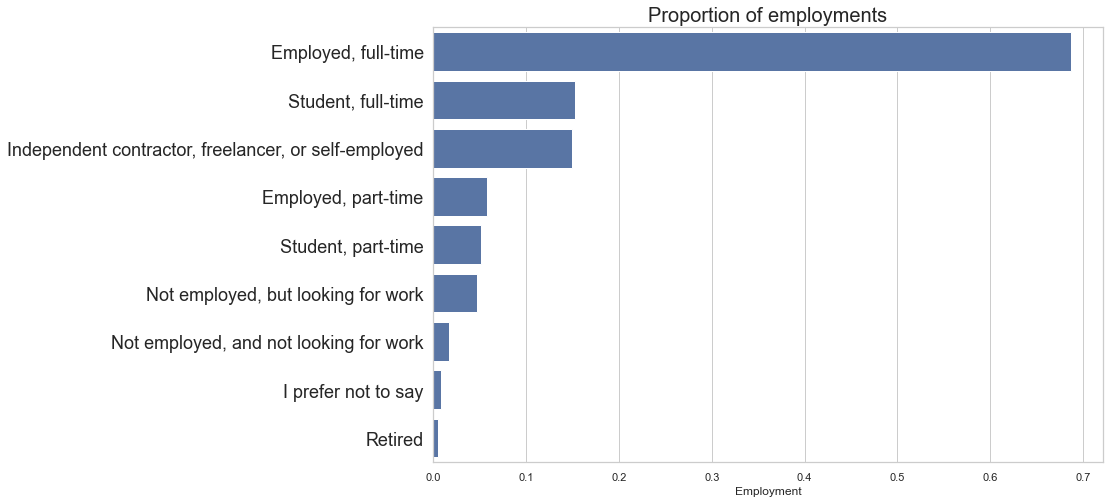

In [332]:
countplot_normalized_exploded(df_use, 'Employment');
plt.title('Proportion of employments', fontsize = 20);
plt.yticks(ticks = range(9), fontsize = 18);

C:\Users\bruno\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


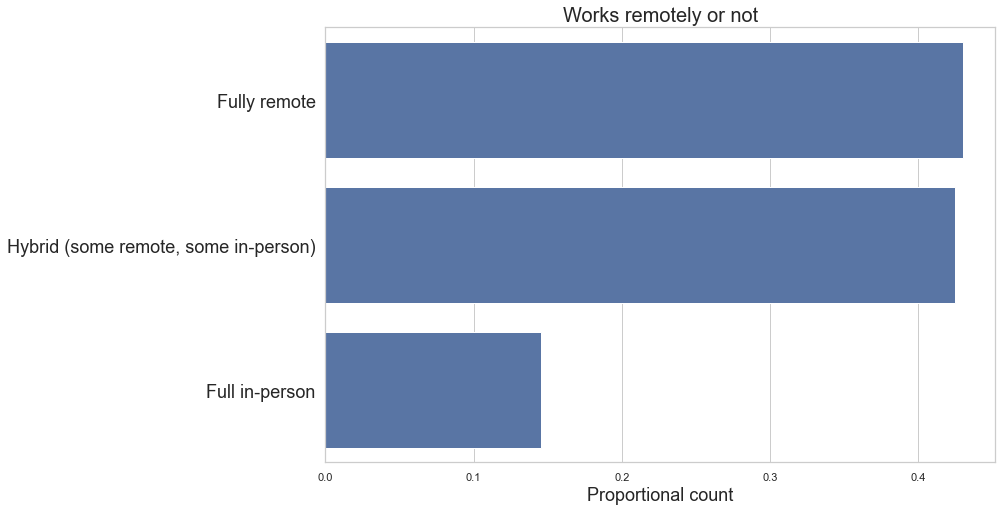

In [327]:
countplot_normalized(df_use, 'RemoteWork')
plt.title('Proportion of remote, hibrid and full in-person work', fontsize = 20)
plt.xlabel('Proportional count', fontsize = 18);
plt.yticks(ticks = range(3), fontsize = 18);

C:\Users\bruno\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


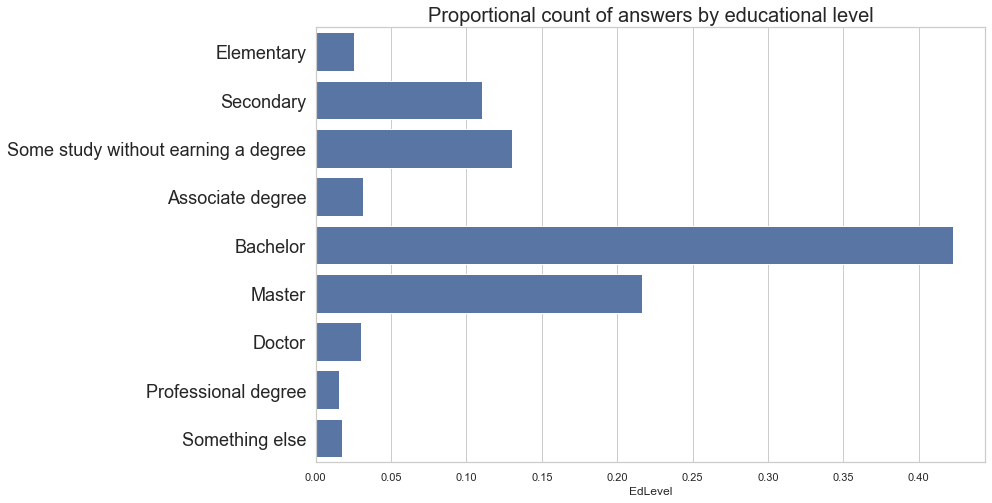

In [335]:
countplot_normalized(df_use, 'EdLevel', order = order_EdLevel);
plt.title('Proportional count of answers by educational level', fontsize = 20);
plt.yticks(ticks = range(0, 9), labels = order_EdLevel, fontsize = 18);

C:\Users\bruno\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


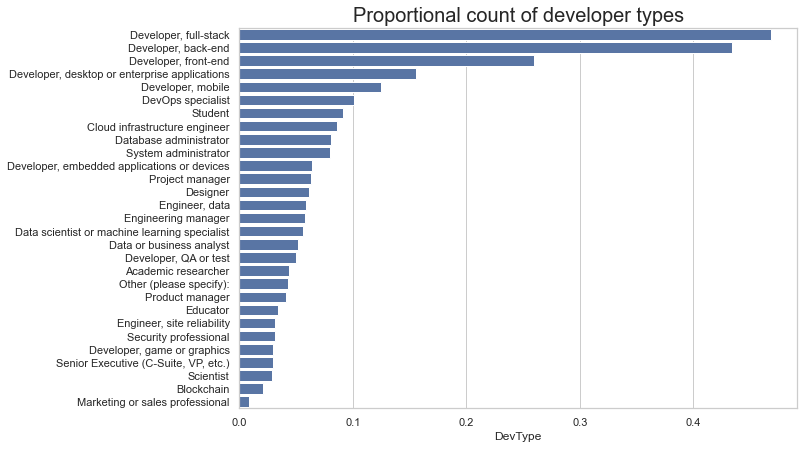

In [337]:
plt.figure(figsize = (10, 7))
countplot_normalized_exploded(df_use, 'DevType')
plt.title('Proportional count of developer types', fontsize = 20);

Text(0.5, 1.0, 'Histogram of years coding experience')

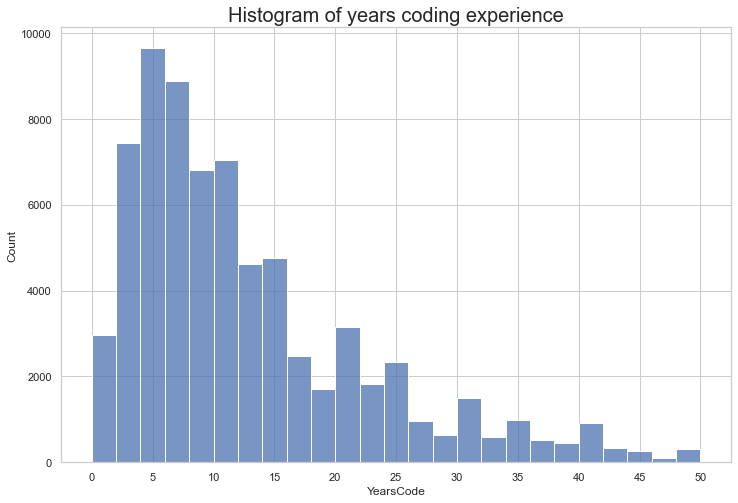

In [320]:
sns.histplot(df_use['YearsCode'], binwidth = 2);
plt.xticks(range(0, 55, 5));
plt.title('Histogram of years coding experience', fontsize = 20)

C:\Users\bruno\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


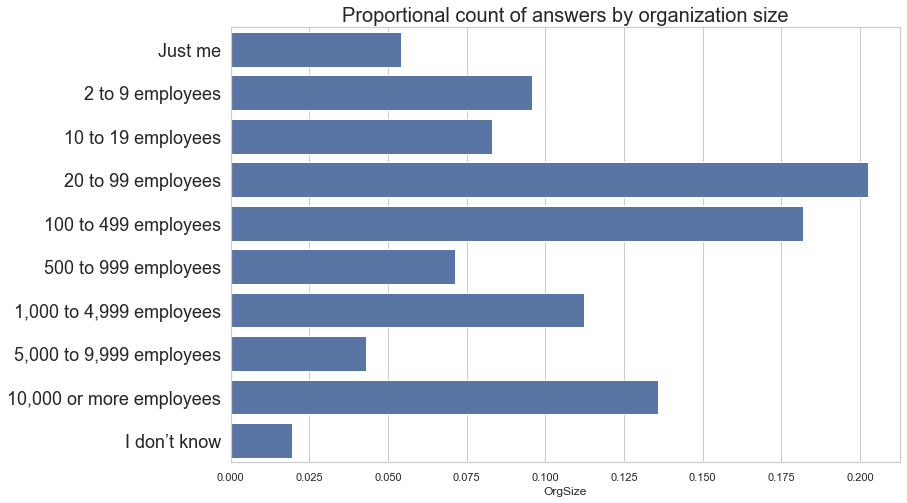

In [340]:
countplot_normalized(df_use, 'OrgSize', order = order_OrgSize);
plt.title('Proportional count of answers by organization size', fontsize = 20);
plt.yticks(ticks = range(10), labels = order_OrgSize, fontsize = 18);

C:\Users\bruno\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


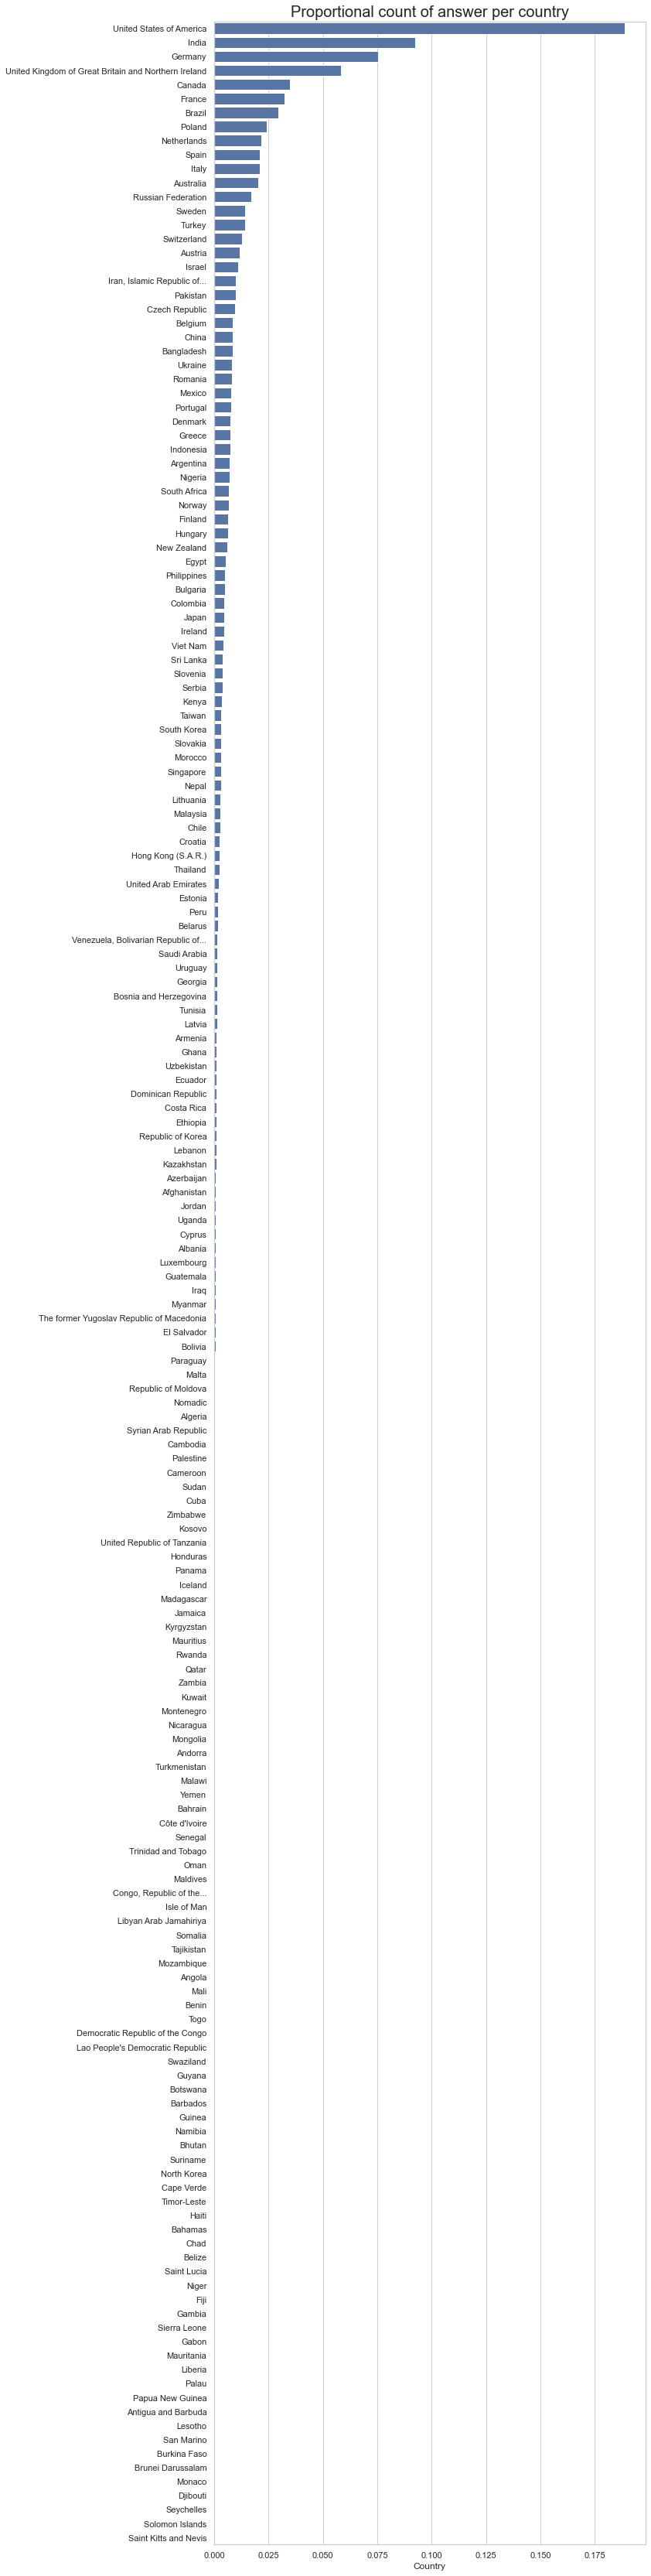

In [331]:
plt.figure(figsize = (10, 60))
countplot_normalized(df_use, 'Country');
plt.title('Proportional count of answer per country', fontsize = 20);

C:\Users\bruno\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


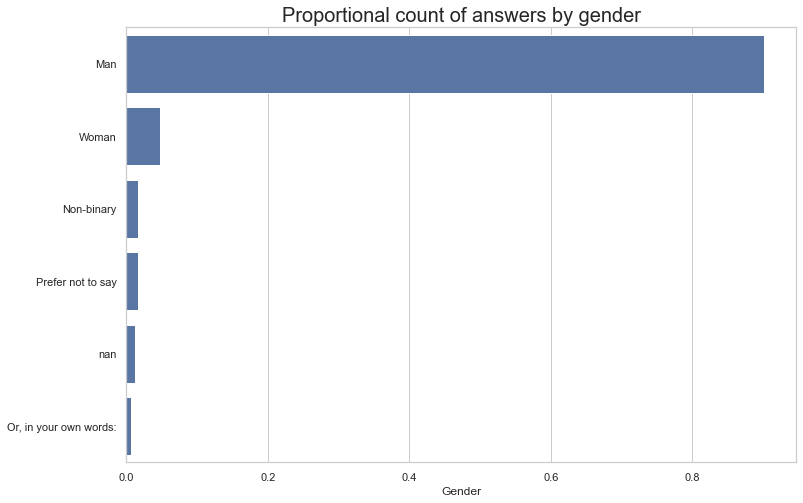

In [341]:
countplot_normalized(df_use, 'Gender');
plt.title('Proportional count of answers by gender', fontsize = 20);

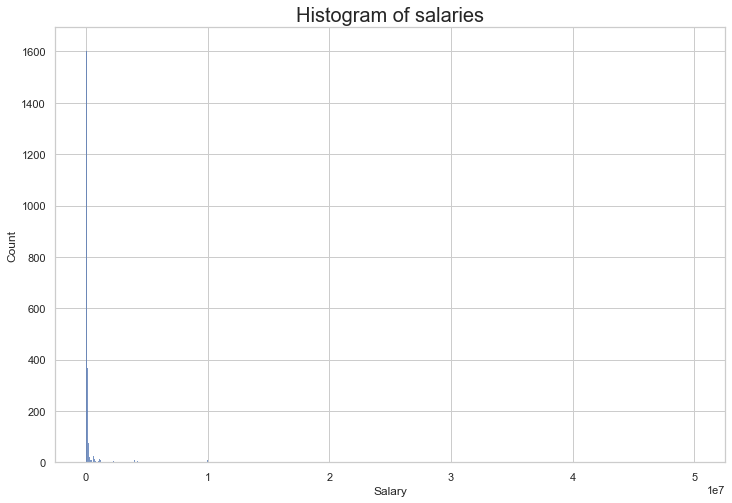

In [343]:
sns.histplot(df_use['Salary']);
plt.title('Histogram of salaries', fontsize = 20);

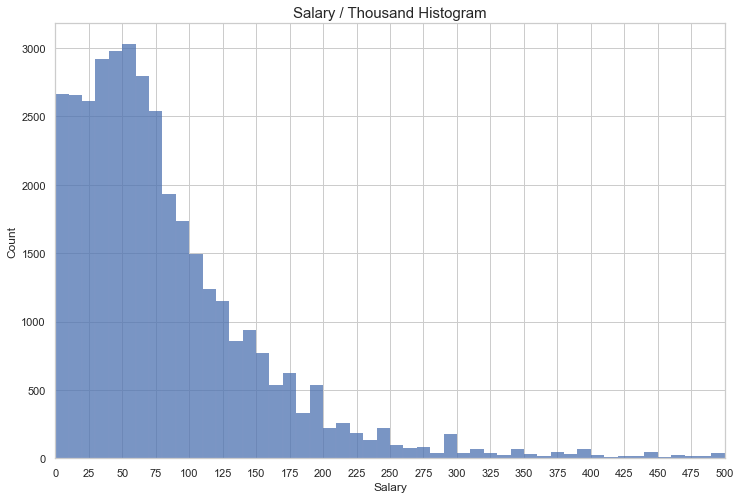

In [208]:
plt.title('Salary / Thousand Histogram', fontsize = 15);
sns.histplot(x = 'Salary', data = df_use, binwidth = 10000);
plt.xlim((0, 500000));
plt.xticks(ticks = np.arange(0,525e3, 25e3), labels = np.arange(0,525, 25));

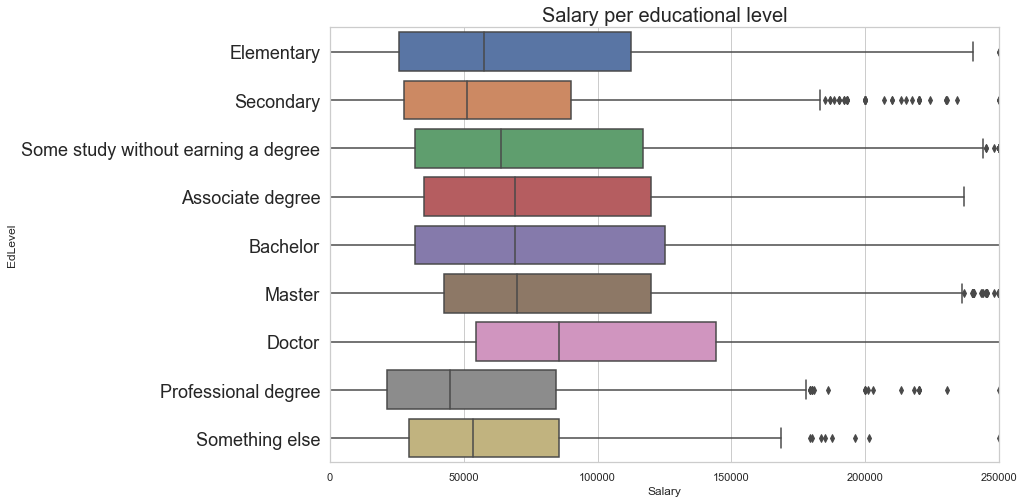

In [346]:
# A strange comportament in Elementary category.
# Only Elementary and Something Else don't follow the tendency of increase in Salary with increase of years coding experience.
sns.boxplot(x = 'Salary', y = 'EdLevel',  data = df_use, order = order_EdLevel);
plt.title('Salary per educational level', fontsize = 20);
plt.xlim(0, 250000);
plt.yticks(ticks = range(9), fontsize = 18);

In [210]:
# Doctors in general earn 22% more than masters and bachelors
groupby_EdLevel_Salary = df_use.groupby('EdLevel').Salary.median()

groupby_EdLevel_Salary.loc['Doctor'] / groupby_EdLevel_Salary.loc['Master']

1.2216142857142858

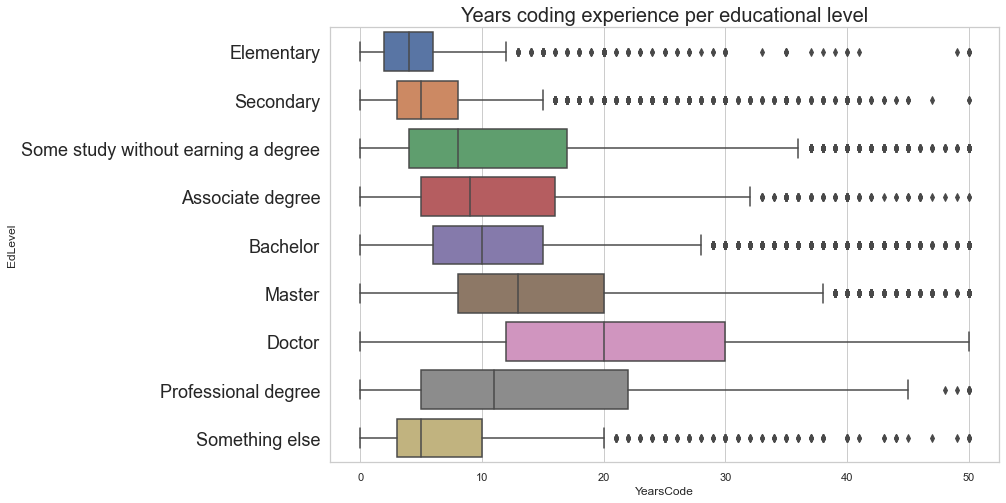

In [347]:
sns.boxplot(data = df_use, x = 'YearsCode', y = 'EdLevel', order = order_EdLevel);
plt.title('Years coding experience per educational level', fontsize = 20);
plt.yticks(ticks = range(9), fontsize = 18);

C:\Users\bruno\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\bruno\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\bruno\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit key

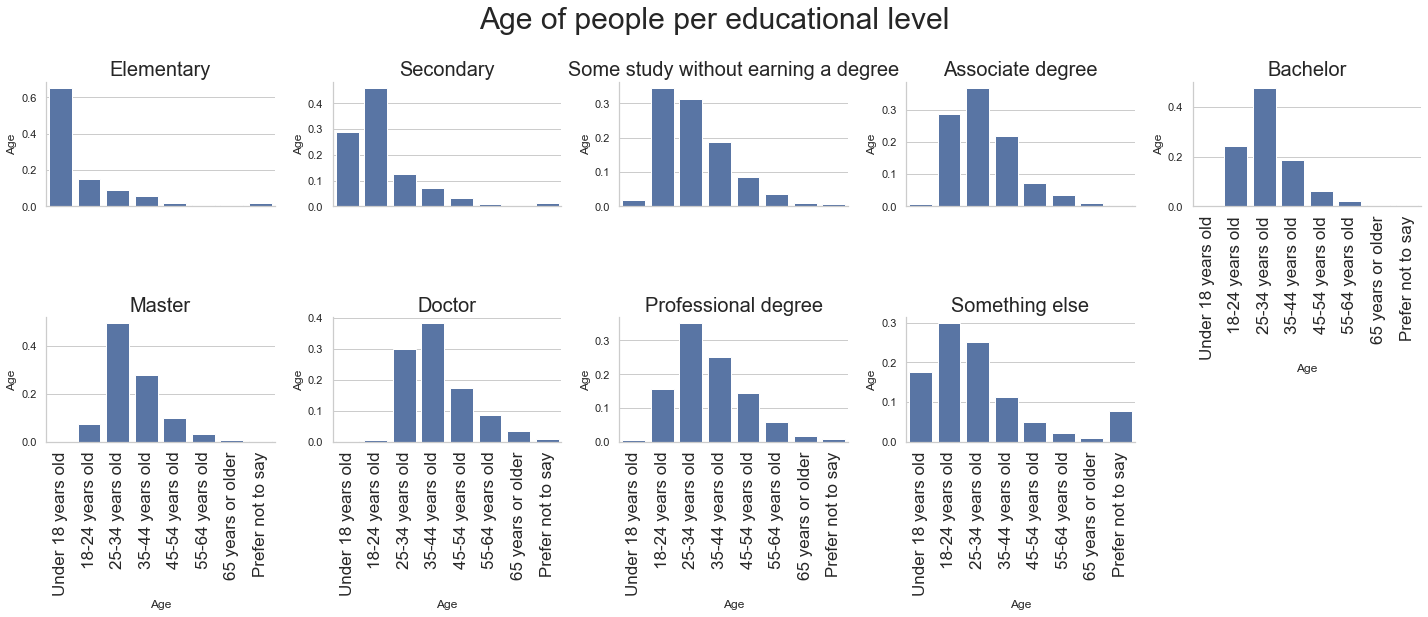

In [382]:
# Age doesn't justify the strange behavior of Elementary salaries
g = sns.FacetGrid(df_use, col = 'EdLevel' , col_wrap = 5, height = 4, sharey = False, col_order = order_EdLevel)
g.map_dataframe(countplot_normalized, x = 'Age', order = order_Age);
g.set_titles(col_template = '{col_name}', size = 20);
g.set_xticklabels(fontsize = 17)
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Age of people per educational level', fontsize = 30);

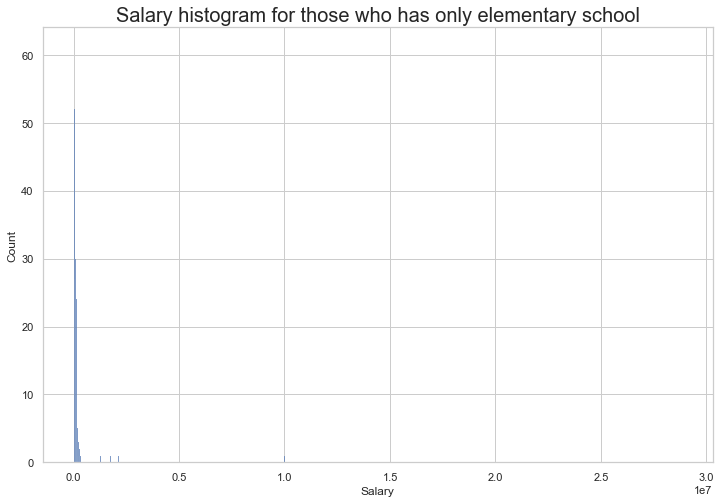

In [363]:
sns.histplot(df_use.query('EdLevel == "Elementary"')['Salary']);
plt.title('Salary histogram for those who has only elementary school', fontsize = 20);

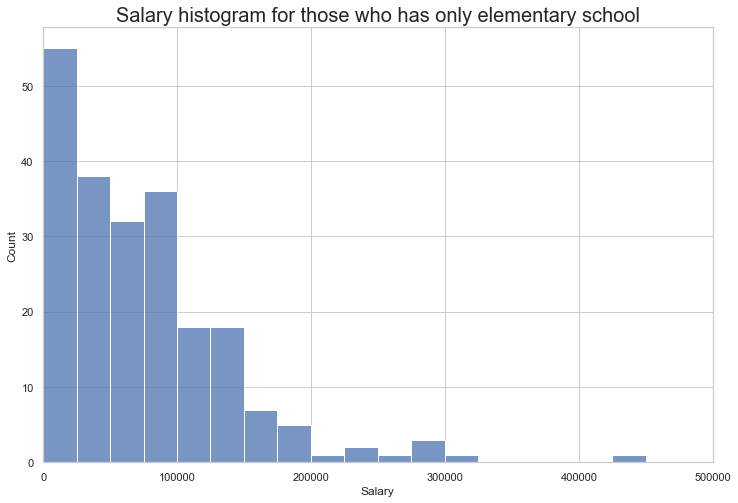

In [364]:
sns.histplot(df_use.query('EdLevel == "Elementary"')['Salary'], bins = range(0, 520000, 25000));
plt.xlim(0, 500000);
plt.title('Salary histogram for those who has only elementary school', fontsize = 20);

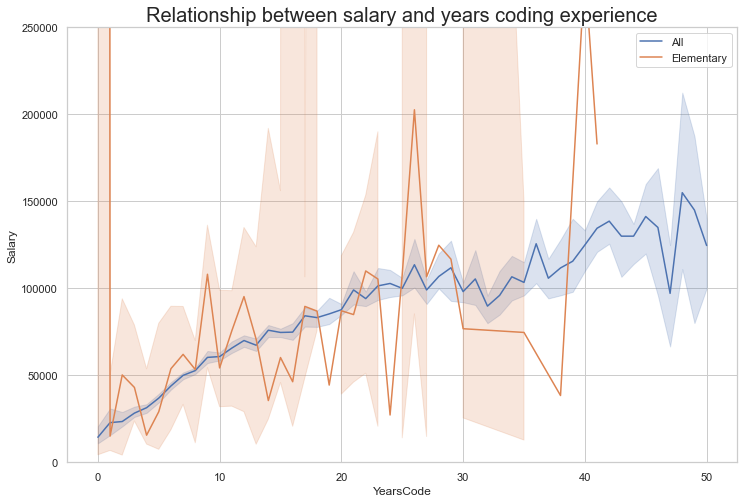

In [365]:
# Salaries in Elementary don't present the average stability trough coding experience years as when considering 
#all educational levels
ax1 = sns.lineplot(x = 'YearsCode', y = 'Salary',estimator = np.median, data = df_use, label = 'All')
ax1.set_ylim([0, 250000])
ax2 = sns.lineplot(x = 'YearsCode', y = 'Salary', estimator = np.median, data = df_use[df_use.EdLevel == 'Elementary'], label = 'Elementary')
ax2.set_ylim([0, 250000]);
plt.title('Relationship between salary and years coding experience', fontsize = 20);

C:\Users\bruno\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\bruno\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\bruno\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit key

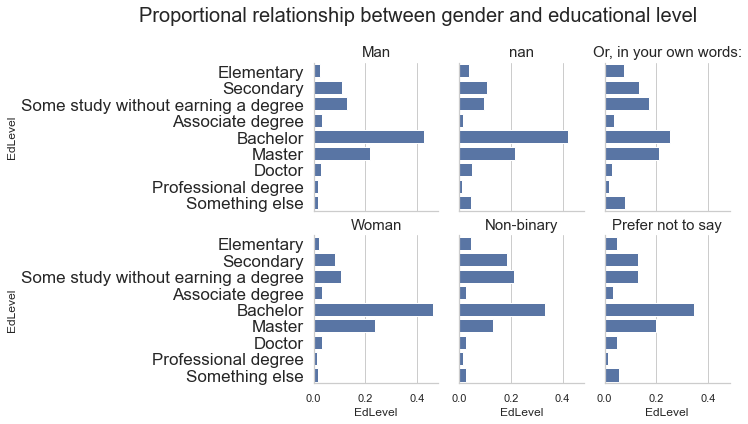

In [378]:
# Queers have less scholarity, are youger, but earn better salaries 
g = sns.FacetGrid(data = df_use, col = 'Gender', col_wrap = 3);
g.map_dataframe(countplot_normalized, y = 'EdLevel', order = order_EdLevel);
g.set_titles(col_template = '{col_name}', size = 15);
g.set_yticklabels(labels = order_EdLevel, fontsize = 17)
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Proportional relationship between gender and educational level', fontsize = 20);

C:\Users\bruno\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\bruno\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\bruno\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit key

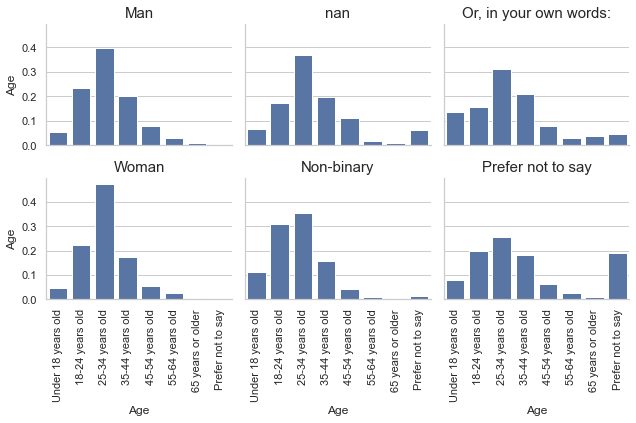

In [373]:
g = sns.FacetGrid(data = df_use, col = 'Gender', col_wrap = 3)
g.map_dataframe(countplot_normalized, x = 'Age', order = order_Age);
g.set_titles(col_template = '{col_name}', row_template = '', size = 15);

Text(0.5, 1.0, 'Salary per gender')

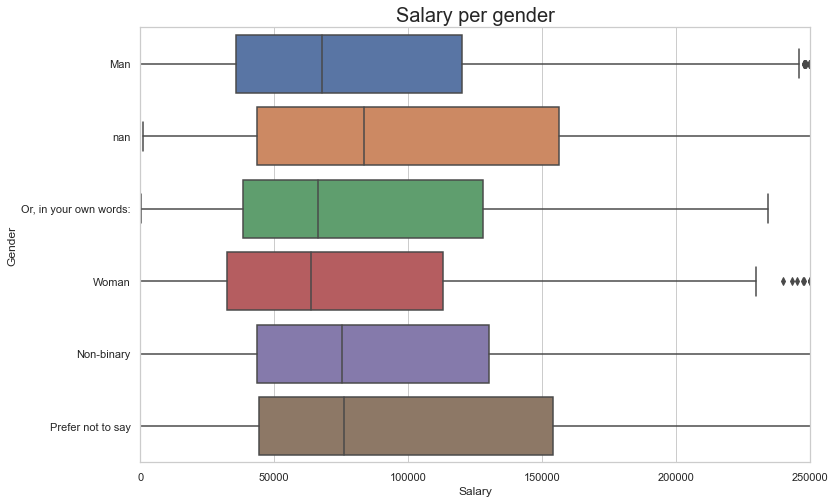

In [379]:
# Queers' and men's salaries are competitive even with queer having less scholarity and less years coding, 
# the lesser salaries of women are acording with years coding experience
sns.boxplot(data = df_use, y = 'Gender', x = 'Salary')
plt.xlim(0,250000);
plt.title('Salary per gender', fontsize = 20)

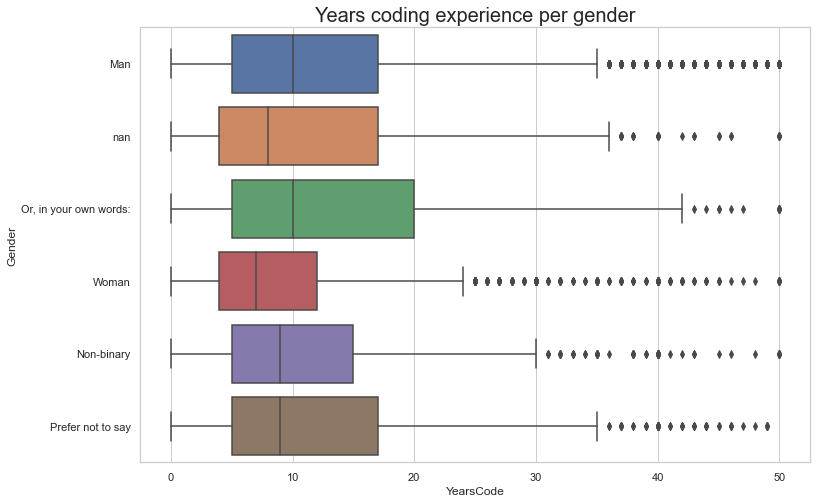

In [380]:
sns.boxplot(x = 'YearsCode', y = 'Gender', data = df_use);
plt.title('Years coding experience per gender', fontsize = 20);

In [220]:
# Number of queers in a country is relatively well correlationate with salaries, 
# this probably justify better salaries for queers in general.
# USA have more than 17% of responses, have big salaries and many queers, 
# this causes a high impact on queer salaries statistics.
groupby_gender_top_10 = top_10_countries.groupby('Country')['Gender'].value_counts(normalize = True)
groupby_gender_top_10 = pd.DataFrame(groupby_gender_top_10)
groupby_gender_top_10.rename(columns = {'Gender': 'Count'}, inplace = True)
groupby_gender_top_10 = groupby_gender_top_10.query('Gender == "Non-binary, genderqueer, or gender non-conforming"').sort_values(by = 'Count', ascending = False)
groupby_gender_top_10

,,Count
Country,Gender,
United States of America,"Non-binary, genderqueer, or gender non-conforming",0.030413
United Kingdom of Great Britain and Northern Ireland,"Non-binary, genderqueer, or gender non-conforming",0.025825
Canada,"Non-binary, genderqueer, or gender non-conforming",0.022535
France,"Non-binary, genderqueer, or gender non-conforming",0.021561
Germany,"Non-binary, genderqueer, or gender non-conforming",0.019320
Netherlands,"Non-binary, genderqueer, or gender non-conforming",0.016119
Brazil,"Non-binary, genderqueer, or gender non-conforming",0.015662
Spain,"Non-binary, genderqueer, or gender non-conforming",0.014502
Poland,"Non-binary, genderqueer, or gender non-conforming",0.012139


In [221]:
groupby_gender_top_10 = top_10_countries.groupby('Country')['Gender'].value_counts(normalize = True)
groupby_gender_top_10 = pd.DataFrame(groupby_gender_top_10)
groupby_gender_top_10.rename(columns = {'Gender': 'Count'}, inplace = True)
groupby_gender_top_10 = groupby_gender_top_10.query('Gender == "Non-binary, genderqueer, or gender non-conforming"').sort_values(by = 'Count', ascending = False)
groupby_gender_top_10

,,Count
Country,Gender,
United States of America,"Non-binary, genderqueer, or gender non-conforming",0.030413
United Kingdom of Great Britain and Northern Ireland,"Non-binary, genderqueer, or gender non-conforming",0.025825
Canada,"Non-binary, genderqueer, or gender non-conforming",0.022535
France,"Non-binary, genderqueer, or gender non-conforming",0.021561
Germany,"Non-binary, genderqueer, or gender non-conforming",0.019320
Netherlands,"Non-binary, genderqueer, or gender non-conforming",0.016119
Brazil,"Non-binary, genderqueer, or gender non-conforming",0.015662
Spain,"Non-binary, genderqueer, or gender non-conforming",0.014502
Poland,"Non-binary, genderqueer, or gender non-conforming",0.012139


In [222]:
top_10_countries.groupby('Country')['Salary'].median().sort_values(ascending = False)

Country
United States of America                                145000.0
Canada                                                   93701.0
United Kingdom of Great Britain and Northern Ireland     82922.0
Germany                                                  69318.0
Netherlands                                              66119.0
France                                                   51192.0
Spain                                                    47990.0
Poland                                                   47172.0
Brazil                                                   27420.0
India                                                    18576.0
Name: Salary, dtype: float64

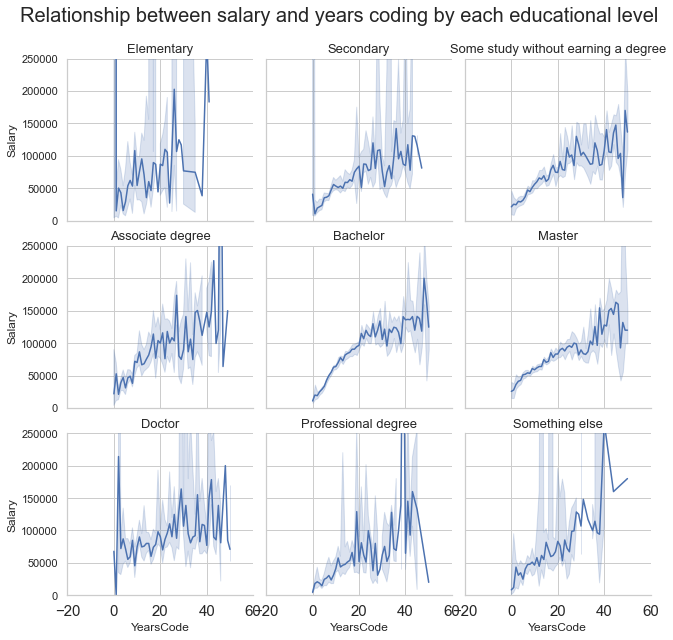

In [395]:
g = sns.FacetGrid(data = df_use, col = 'EdLevel', col_wrap = 3, col_order = order_EdLevel);
g.map(sns.lineplot, 'YearsCode',  'Salary', estimator = np.median);
plt.ylim(0, 250000);
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Relationship between salary and years coding by each educational level', fontsize = 20);
g.set_titles(col_template = '{col_name}', size = 13);
g.set_xticklabels(fontsize = 15);

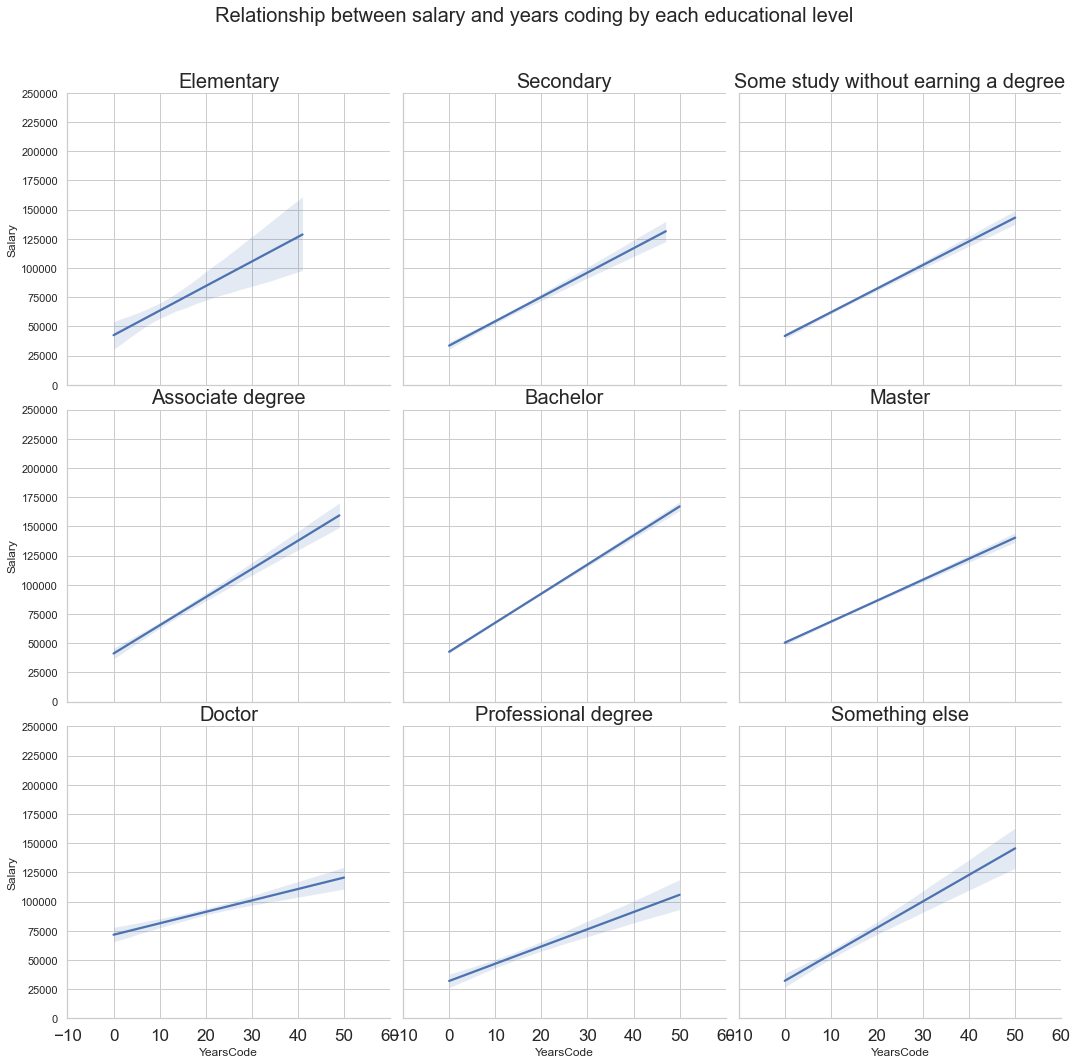

In [394]:
g = sns.lmplot(x = 'YearsCode', y = 'Salary', data = df_use_250k, col = 'EdLevel', col_wrap = 3, scatter_kws = {'alpha': 0}, col_order = order_EdLevel)
plt.ylim(0, 250000)
plt.yticks(np.arange(0, 275000, 25000));
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Relationship between salary and years coding by each educational level', fontsize = 20);
g.set_titles(col_template = '{col_name}', size = 20);
g.set_xticklabels(fontsize = 17);

In [225]:
columns_lm = list(['intercept']) + list(np.delete([Country for Country in top_10_countries_250k_non_null['Country'].unique()], 0)) + list([EdLevel + '_code' for EdLevel in top_10_countries_250k_non_null['EdLevel'].unique()])  

lm = sm.OLS(top_10_countries_250k_non_null['Salary'], top_10_countries_250k_non_null[columns_lm])
results = lm.fit()

print('Salaries in USA')
for years in np.arange(0, 52, 2):
    print('Master, ', years, ' years', results.predict([1 if value in ['intercept', 'United States of America'] else years if value in ['United States of America_code', 'Master_code'] else 0 for value in columns_lm]))
    print('Doctor, ', years, ' years',results.predict([1 if value in ['intercept', 'United States of America'] else years if value in ['United States of America_code', 'Doctoral_code'] else 0 for value in columns_lm]))
results.summary()

Salaries in USA
Master,  0  years [114852.5050373]
Doctor,  0  years [114852.5050373]
Master,  2  years [117939.6400725]
Doctor,  2  years [114852.5050373]
Master,  4  years [121026.77510769]
Doctor,  4  years [114852.5050373]
Master,  6  years [124113.91014288]
Doctor,  6  years [114852.5050373]
Master,  8  years [127201.04517808]
Doctor,  8  years [114852.5050373]
Master,  10  years [130288.18021327]
Doctor,  10  years [114852.5050373]
Master,  12  years [133375.31524846]
Doctor,  12  years [114852.5050373]
Master,  14  years [136462.45028366]
Doctor,  14  years [114852.5050373]
Master,  16  years [139549.58531885]
Doctor,  16  years [114852.5050373]
Master,  18  years [142636.72035404]
Doctor,  18  years [114852.5050373]
Master,  20  years [145723.85538924]
Doctor,  20  years [114852.5050373]
Master,  22  years [148810.99042443]
Doctor,  22  years [114852.5050373]
Master,  24  years [151898.12545962]
Doctor,  24  years [114852.5050373]
Master,  26  years [154985.26049482]
Doctor,  2

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     1258.
Date:                Sat, 10 Sep 2022   Prob (F-statistic):               0.00
Time:                        15:47:06   Log-Likelihood:            -2.5563e+05
No. Observations:               21282   AIC:                         5.113e+05
Df Residuals:                   21263   BIC:                         5.115e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
intercept                                 6.339e+04    956.749     66.260      0.000    6.15e+04    6.53e+04
Netherlands                              -1.035e+04   1595.131     -6.487      0.000   -1.35e+04   -7221.521
United States of America                  5.146e+04    949.156     54.215      0.000    4.96e+04    5.33e+04
Canada                                    1.374e+04   1362.455     10.082      0.000    1.11e+04    1.64e+04
Germany                                  -1.164e+04   1135.477    -10.249      0.000   -1.39e+04   -9411.590
Poland                                   -2.628e+04   1539.298    -17.074      0.000   -2.93e+04   -2.33e+04
France                                   -2.596e+04   1400.908    -18.533      0.000   -2.87e+04   -2.32e+04
Brazil                                   -4.171e+04   1401.394    -29.760      0.000   -4.45e+04    -3.9e+04
Spain                                    -2.877e+04   1576.709    -18.245      0.000   -3.19e+04   -2.57e+04
India                                    -4.672e+04   1223.778    -38.174      0.000   -4.91e+04   -4.43e+04
Master_code                               1543.5675     38.021     40.598      0.000    1469.044    1618.091
Bachelor_code                             1277.8909     35.532     35.964      0.000    1208.245    1347.537
Something else_code                        777.0764    175.818      4.420      0.000     432.460    1121.693
Associate degree_code                      877.6867     83.820     10.471      0.000     713.393    1041.980
Some study without earning a degree_code  1150.7011     48.168     23.890      0.000    1056.289    1245.113
Secondary_code                             991.6500     91.714     10.812      0.000     811.884    1171.416
Professional degree_code                  1095.5370    120.859      9.065      0.000     858.644    1332.430
Doctor_code                               1162.7479     61.964     18.765      0.000    1041.294    1284.201
Elementary_code                           1465.9880    285.485      5.135      0.000     906.416    2025.560
==============================================================================
Omnibus:                     2875.714   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6455.516
Skew:                           0.806   Prob(JB):                         0.00
Kurtosis:                       5.164   Cond. No.                         121.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\bruno\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\bruno\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\bruno\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit key

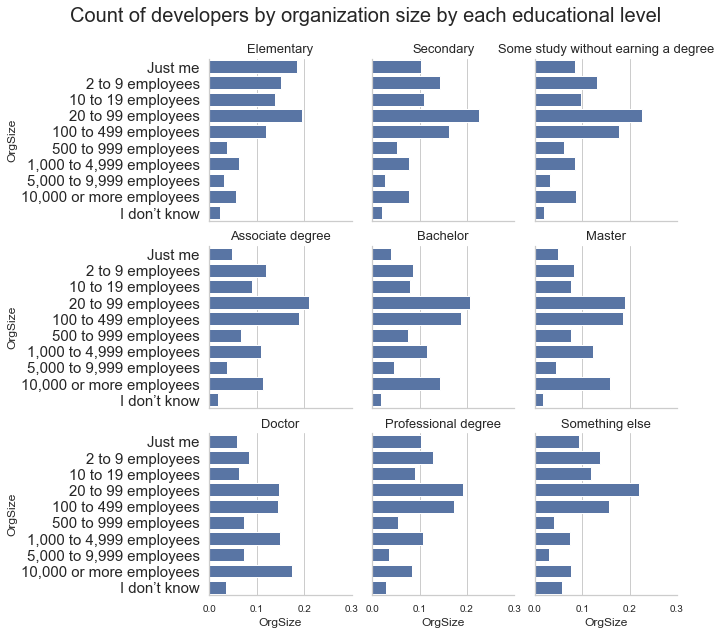

In [397]:
#With increase of titulation there is an increase in company
g = sns.FacetGrid(df_use, col = 'EdLevel' , col_wrap = 3, col_order = order_EdLevel)
g.map_dataframe(countplot_normalized, y = 'OrgSize', order = order_OrgSize);
g.set_titles(col_template = '{col_name}', size = 13);
g.set_xticklabels(fontdict = {'fontsize': 10});
g.set_yticklabels(labels = order_OrgSize, fontdict = {'fontsize': 15});
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Count of developers by organization size by each educational level', fontsize = 20);

C:\Users\bruno\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\bruno\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\bruno\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit key

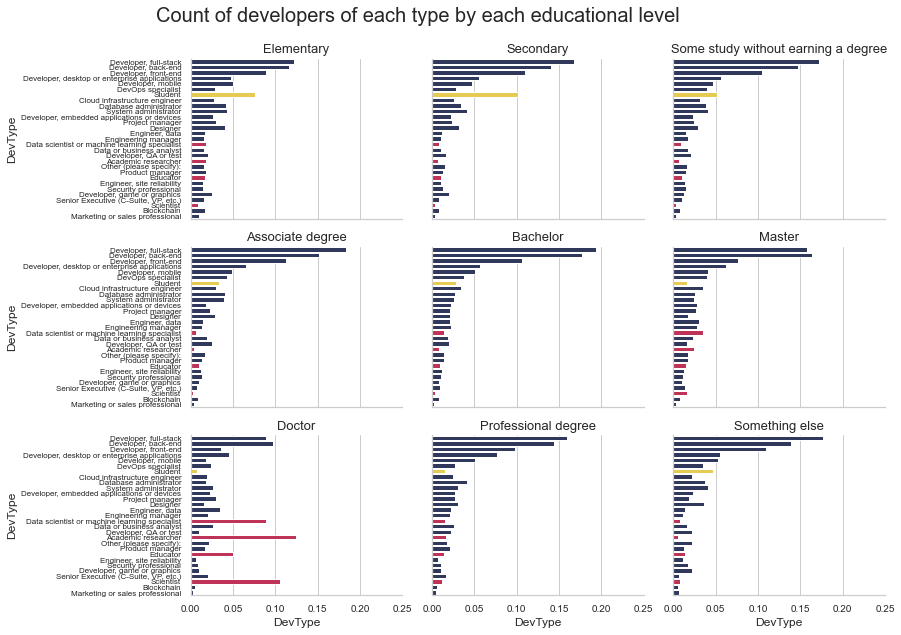

In [398]:
# Doctors are much more inclined to be Scientists, Academic Researchers, data science or machine learning specialist 
# and educators than others developers. Those who have only primary school and secondary school are more propense to be student, 
# probably studying in secondary school and bachelor respectively
g = sns.FacetGrid(exploded_DevType, col = 'EdLevel' , col_wrap = 3, aspect = 1.5, col_order = order_EdLevel)
g.map_dataframe(countplot_normalized, y = 'DevType', order = order_DevType, palette = palette_DevType);
g.set_yticklabels(labels = order_DevType, fontsize = 10);
g.set_titles(col_template = '{col_name}', size = 13);
g.set_xticklabels(fontdict = {'fontsize': 10});
g.set_yticklabels(labels = order_DevType, fontdict = {'fontsize': 8});
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Count of developers of each type by each educational level', fontsize = 20);

C:\Users\bruno\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\bruno\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\bruno\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit key

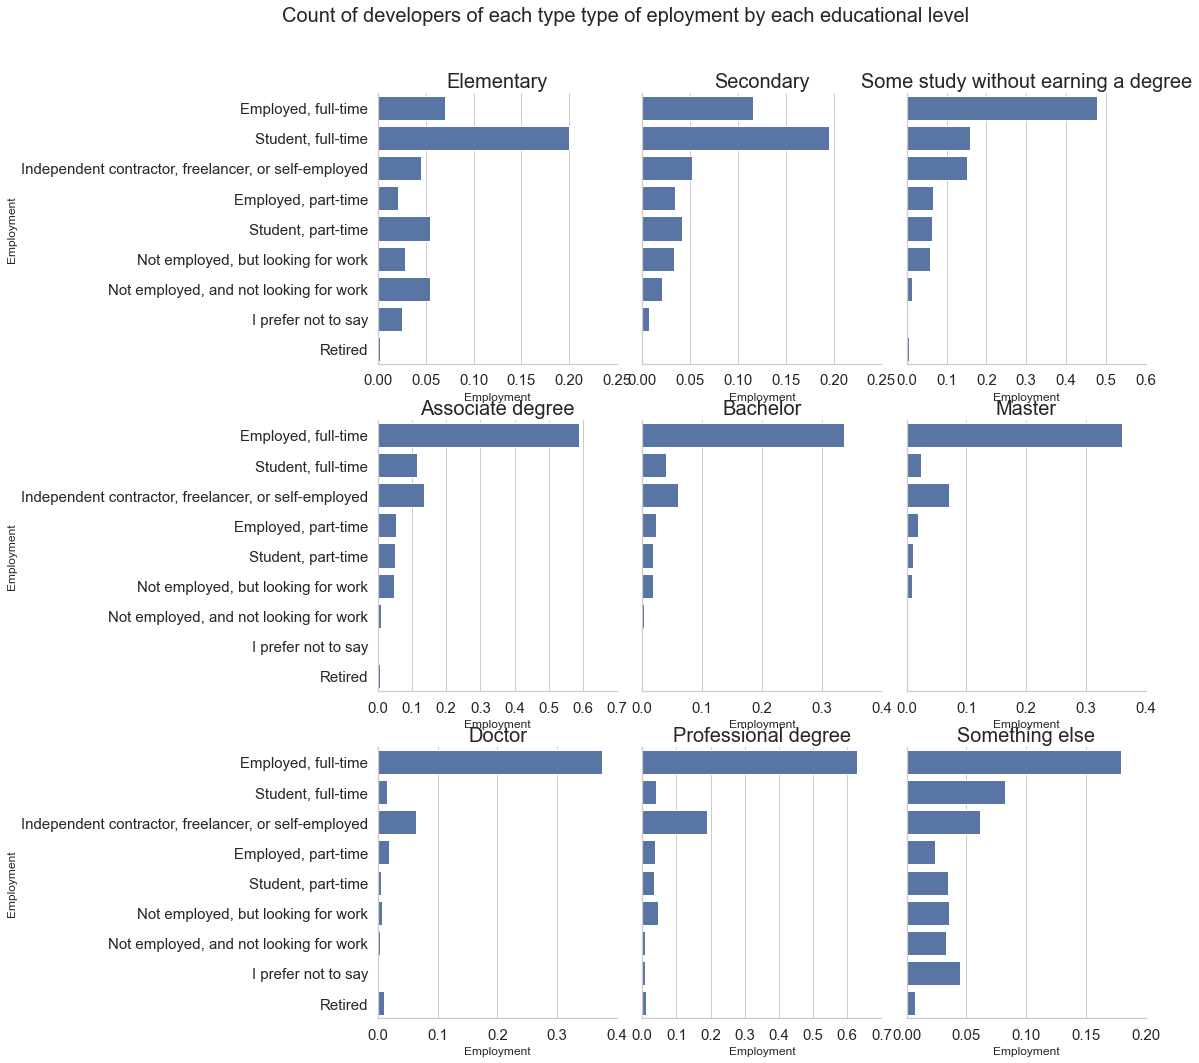

In [399]:
#Relationship between Student and EdLevel as seen above
g = sns.FacetGrid(exploded_Employment, col = 'EdLevel' , sharex = False, col_wrap = 3, height = 5, col_order = order_EdLevel)
g.map_dataframe(countplot_normalized, y = 'Employment', order = exploded_Employment.Employment.value_counts().index);
g.set_yticklabels(labels = exploded_Employment.Employment.value_counts().index, fontsize = 10)
g.set_titles(col_template = '{col_name}', size = 20);
g.set_xticklabels(fontdict = {'fontsize': 15});
g.set_yticklabels(labels = exploded_Employment.Employment.value_counts().index, fontdict = {'fontsize': 15});
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Count of developers of each type type of eployment by each educational level', fontsize = 20);


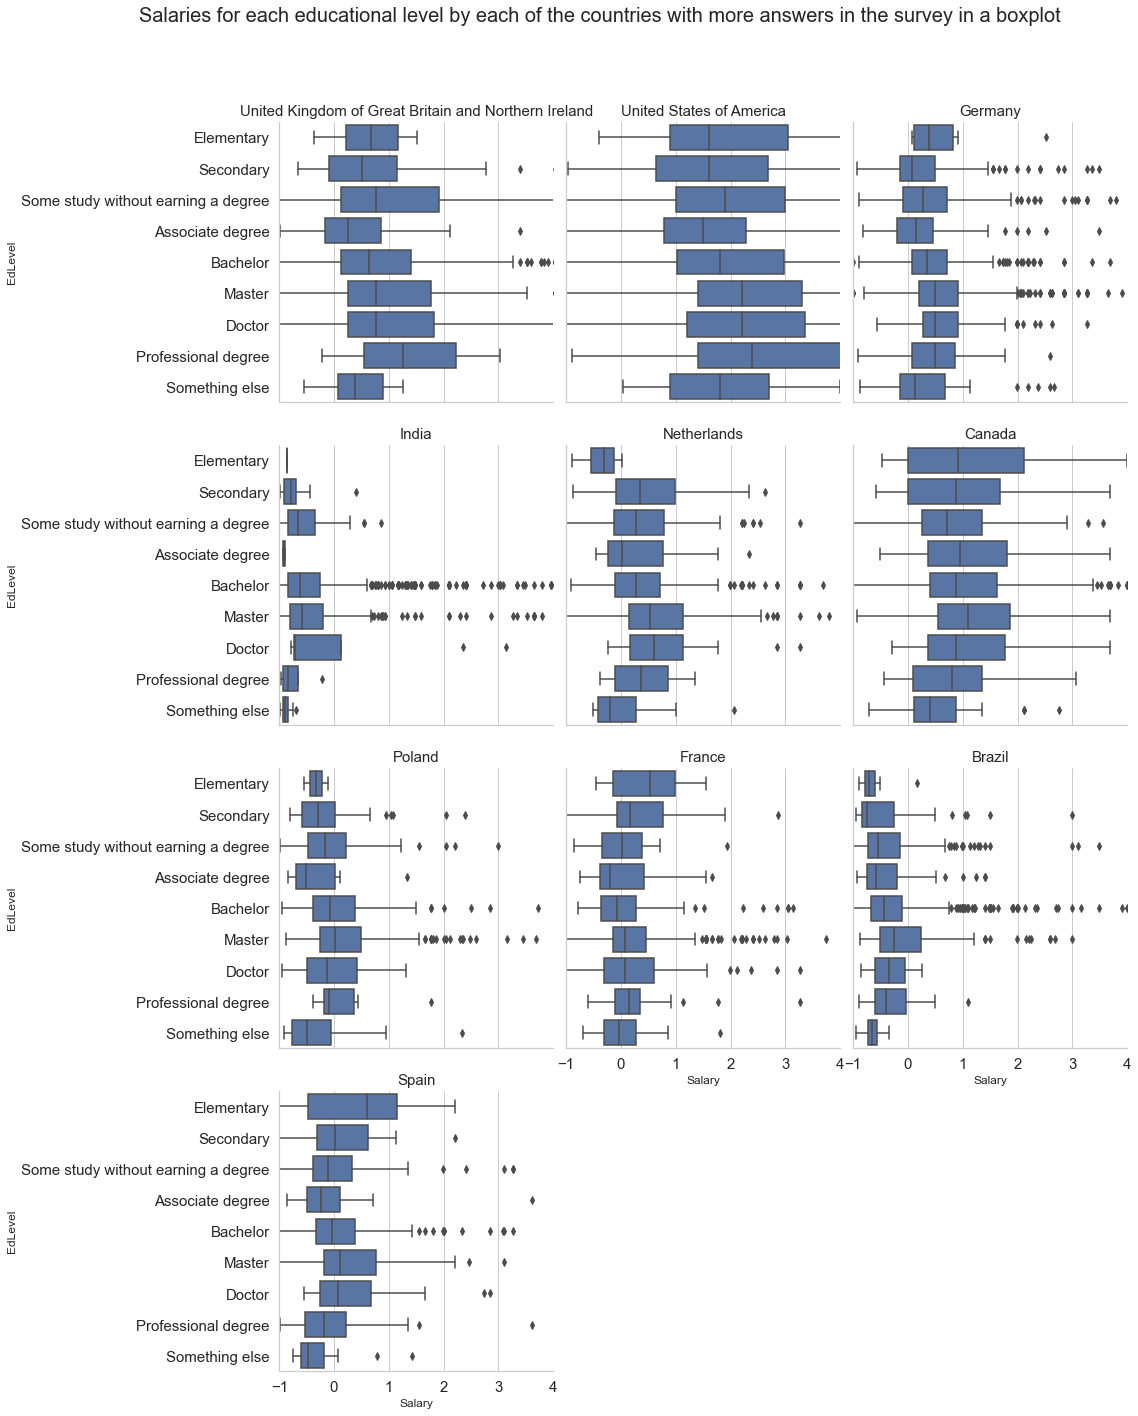

In [403]:
g = sns.FacetGrid(data = top_10_countries, col = 'Country', col_order = top_10_countries.Country.unique(), col_wrap = 3, height = 5);
g.map_dataframe(sns.boxplot, x = 'Salary', y = 'EdLevel', order = order_EdLevel);
g.set(xlim = (0, 250000));
g.set_titles(col_template = '{col_name}', size = 15);
g.set_xticklabels(fontdict = {'fontsize': 15});
g.set_yticklabels(fontdict = {'fontsize': 15});
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Salaries for each educational level by each of the countries with more answers in the survey in a boxplot', fontsize = 20);

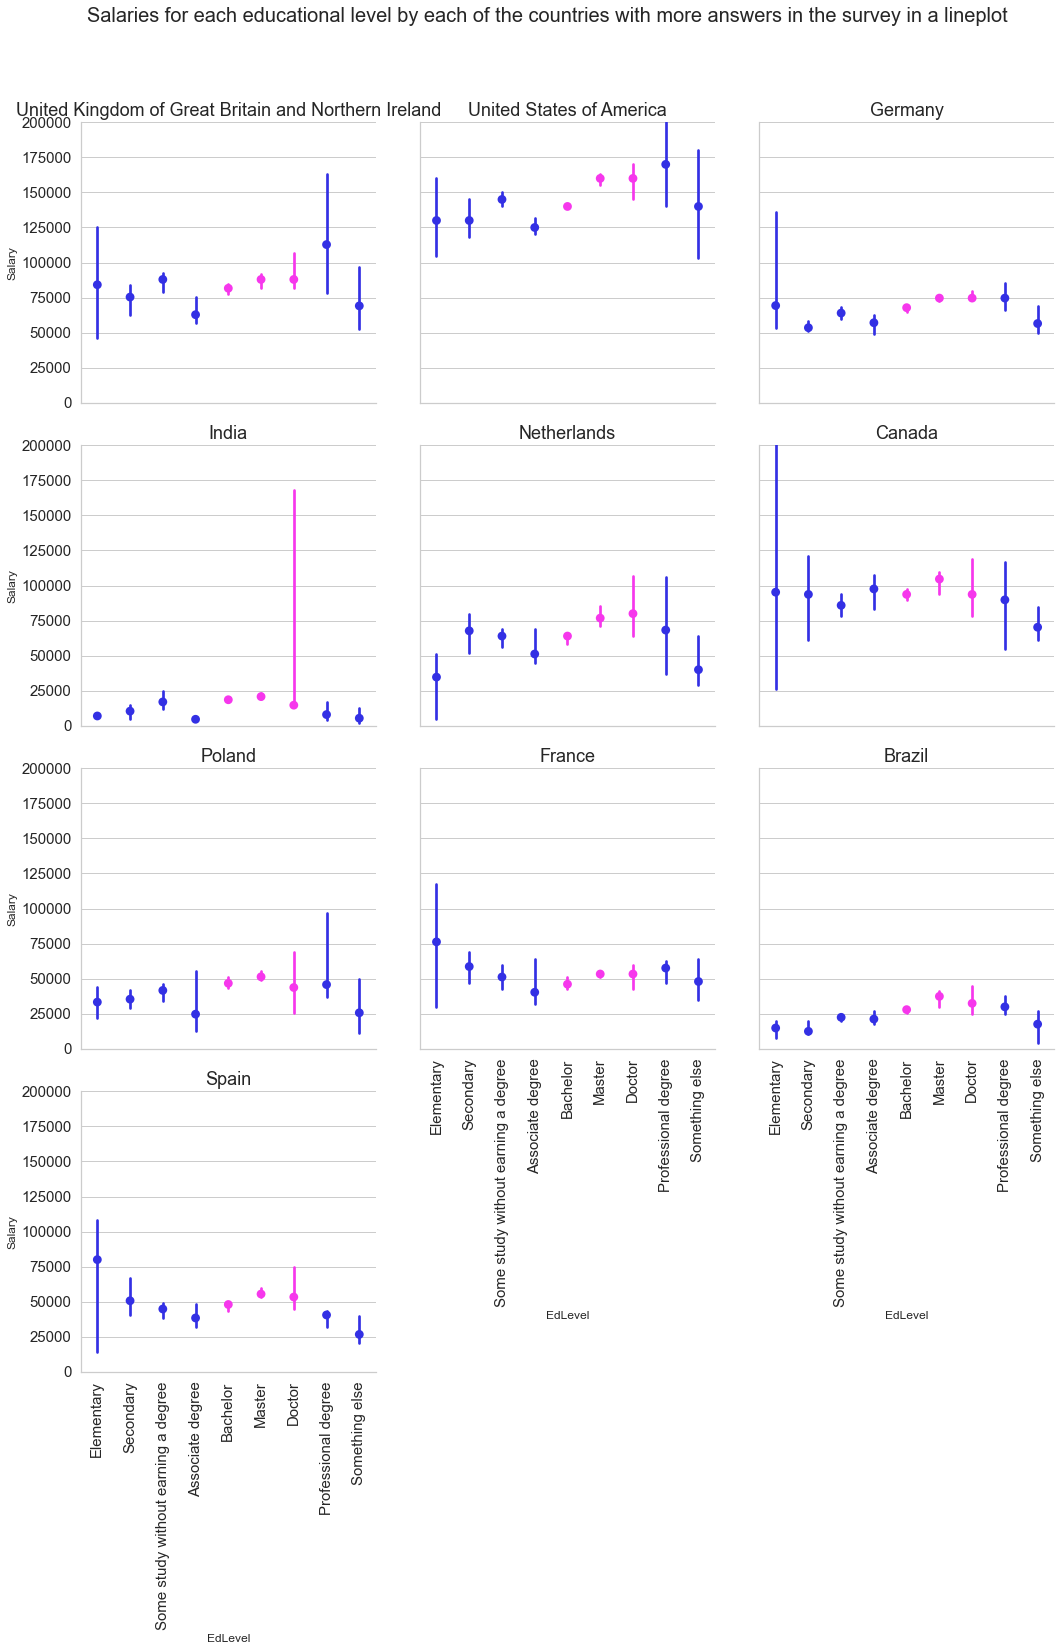

In [404]:
#Doctors, in most of those top 10 countries earn less than masters. Which diverges of the entire dataset analysis
g = sns.FacetGrid(data = top_10_countries, col = 'Country', col_order = top_10_countries.Country.unique(), col_wrap = 3, height = 5);
g.map_dataframe(sns.pointplot, y = 'Salary',x = 'EdLevel', estimator = np.median, order = order_EdLevel, palette = palette_EdLevel);
g.set(ylim = (0, 200000));
g.set_titles(col_template = '{col_name}', size = 18);
g.set_xticklabels(rotation = 90, fontdict = {'fontsize': 15});
g.set_yticklabels(labels = range(0, 225000, 25000), fontdict = {'fontsize': 15});
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Salaries for each educational level by each of the countries with more answers in the survey in a lineplot', fontsize = 20);